#  NAD Marketing Insights and Analytics

- ### Case Study Aim - Develop model(s) that predict customers probability of default.

# 1. Data Cleansing

In [1]:
# Import the required Packages
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress warnings
pd.options.display.max_columns = None # Remove pandas display column number limit

In [2]:
# Read the data into DataFrames.
data = pd.read_csv("data.csv",index_col=0)

In [3]:
# Look at the date shape
data.shape

(30000, 23)

In [4]:
# Breif look at the data
data.head()

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,,,,,,,,,,,,,,,,,,,,,,,
20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
#Resetting the Index
data.reset_index(level=0, inplace=True)

 **Renaming the column names**

In [6]:
data.columns = ['Credit_limit','Sex','Education','Marital_Status','Age','Pay_Hist_Sep','Pay_Hist_Aug','Pay_Hist_Jul',
                'Pay_Hist_Jun','Pay_Hist_May','Pay_Hist_Apr','Bill_Amt_Sep',
                'Bill_Amt_Aug','Bill_Amt_Jul','Bill_Amt_Jun','Bill_Amt_May','Bill_Amt_Apr',
                'Pay_Amt_Sep','Pay_Amt_Aug','Pay_Amt_Jul','Pay_Amt_Jun','Pay_Amt_May','Pay_Amt_Apr','Default']

In [7]:
# look at the data with header
data.head()

,Credit_limit,Sex,Education,Marital_Status,Age,Pay_Hist_Sep,Pay_Hist_Aug,Pay_Hist_Jul,Pay_Hist_Jun,Pay_Hist_May,Pay_Hist_Apr,Bill_Amt_Sep,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sep,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
# Check for Null values in the datasets
data.isnull().values.any()

False

Data Set do not have any Null values

In [136]:
data.describe()

,Credit_limit,Sex,Education,Marital_Status,Age,Pay_Hist_Sep,Pay_Hist_Aug,Pay_Hist_Jul,Pay_Hist_Jun,Pay_Hist_May,Pay_Hist_Apr,Bill_Amt_Sep,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sep,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The average value for the amount of credit card limit is 167,484 dollars. The standard deviation is 129,747 dollars, ranging from 10,000 to 1M dollars.
Education level is mostly graduate school (1) and university (2). Most of the clients are either married or single (less frequent the other status). Average age is 35.5 years, with a standard deviation of 9.2 years.

In [9]:
# Separating features and target
y = data.Default     # target default=1 or non-default=0
features = data.drop('Default', axis = 1, inplace = False)

In [10]:
data['Education'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

- **According to description we should have values 1,2,3,4 thus we will change 5,6,0 to 4 i.e. others**

In [11]:
data.Education[data.Education==0]=4
data.Education[data.Education==5]=4
data.Education[data.Education==6]=4
data.Education.unique()

array([2, 1, 3, 4], dtype=int64)

In [12]:
data.Sex.value_counts()

2    18112
1    11888
Name: Sex, dtype: int64

In [13]:
data.Marital_Status.unique()

array([1, 2, 3, 0], dtype=int64)

- **According to description we should have values 1,2,3 thus we will change 0 to 3 i.e. others**

In [14]:
data.Marital_Status[data.Marital_Status==0]=3
data.Marital_Status.unique()

array([1, 2, 3], dtype=int64)

In [15]:
# Check for values less than 0
(data.Age[data.Age<0].count(),
data.Credit_limit[data.Credit_limit<0].count())

(0, 0)

# 2. Exploratory Data Analysis

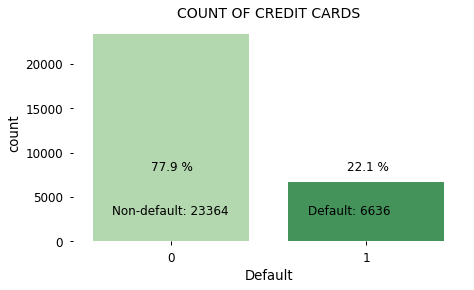

In [16]:
# The frequency of defaults
yes = data.Default.sum()
no = len(data)-yes

# Percentage
yes_perc = round(yes/len(data)*100, 1)
no_perc = round(no/len(data)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Default',data=data, palette="Greens")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);

- 22.12 % of people are defaulters.

### Frequency of explanatory variables (categorical) by defaulted and non-defaulted cards

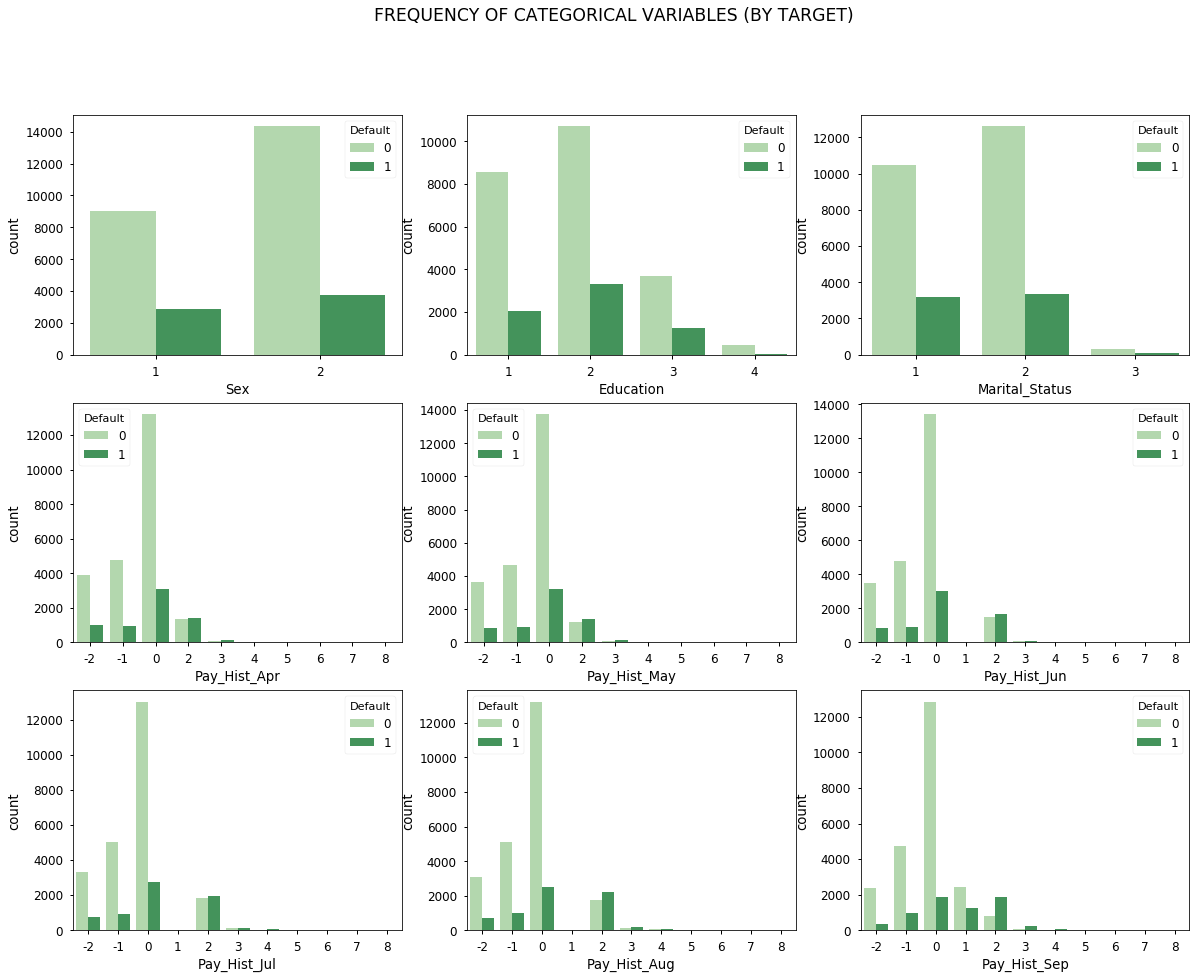

In [17]:
# Creating a new dataframe with categorical variables
subset = data[['Sex', 'Education', 'Marital_Status', 'Pay_Hist_Apr', 'Pay_Hist_May', 'Pay_Hist_Jun', 'Pay_Hist_Jul', 
               'Pay_Hist_Aug', 'Pay_Hist_Sep', 'Default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="Sex", hue="Default", data=subset, palette="Greens", ax=axes[0,0])
ax2 = sns.countplot(x="Education", hue="Default", data=subset, palette="Greens",ax=axes[0,1])
ax3 = sns.countplot(x="Marital_Status", hue="Default", data=subset, palette="Greens",ax=axes[0,2])
ax4 = sns.countplot(x="Pay_Hist_Apr", hue="Default", data=subset, palette="Greens", ax=axes[1,0])
ax5 = sns.countplot(x="Pay_Hist_May", hue="Default", data=subset, palette="Greens", ax=axes[1,1])
ax6 = sns.countplot(x="Pay_Hist_Jun", hue="Default", data=subset, palette="Greens", ax=axes[1,2])
ax7 = sns.countplot(x="Pay_Hist_Jul", hue="Default", data=subset, palette="Greens", ax=axes[2,0])
ax8 = sns.countplot(x="Pay_Hist_Aug", hue="Default", data=subset, palette="Greens", ax=axes[2,1])
ax9 = sns.countplot(x="Pay_Hist_Sep", hue="Default", data=subset, palette="Greens", ax=axes[2,2]);

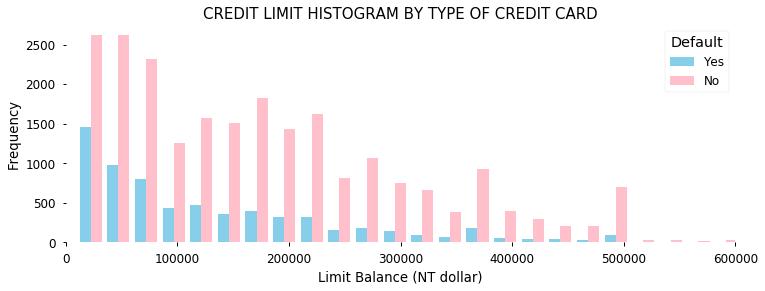

In [18]:
x1 = list(data[data['Default'] == 1]['Credit_limit'])
x2 = list(data[data['Default'] == 0]['Credit_limit'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, normed=False,color=['skyblue', 'pink'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('CREDIT LIMIT HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);


### Visualize Data with t-SNE

t-SNE is a technique for dimensionality reduction that is well suited to visualise high-dimensional datasets. Lets have a first look on the map that will set some expectations for the prediction accuracy i.e. if our dataset has many overlaps it would be good if our model achieves an accuracy of 60-70%.!

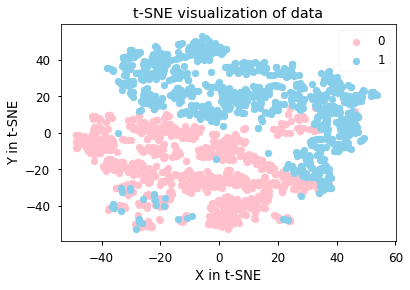

In [54]:
#Set df4 equal to a set of a sample of 1000 deafault and 1000 non-default observations.
df2 = data[data.Default == 0].sample(n = 1000)
df3 = data[data.Default == 1].sample(n = 1000)
df4 = pd.concat([df2, df3], axis = 0)

#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df4_std = standard_scaler.fit_transform(df4)

#Set y equal to the target values.
y = df4.Default

tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df4_std)

#Build the scatter plot with the two types of transactions.
color_map = {0:'pink', 1:'skyblue'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], y = x_test_2d[y==cl,1], c = color_map[idx], label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper right')
plt.title('t-SNE visualization of data')
plt.show()

**The plot reveals a rather imbalanced dataset which means we should not expect very accurate model.**

- **Now let us check the correlation between different features**

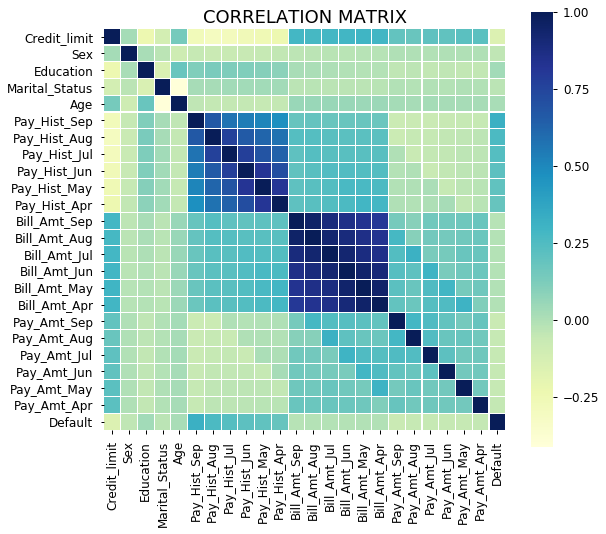

In [20]:
#  looking at correlations matrix, defined via Pearson function  
corr = data.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(9, 8))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="YlGnBu", linewidths=.1, ax=ax)
plt.title('CORRELATION MATRIX', size=18);

The heatmat shows that features are correlated with each other (collinearity), such us like PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6. In those cases, the correlation is positive.

We can see above that PAY_0,PAY_2...have high positive correlation to DEFAULTER and LIMIT_BAL has pretty high negative correlation

In [21]:
# function to make a bar plot
def plot0(col1, col2, tittle, xticks, train):
    dt = train.groupby(col1).agg([np.mean])*100.0
    dt = dt[col2].reset_index()
    f, ax = plt.subplots(figsize=(5, 5))
    sns.barplot(x=col1, y="mean", data=dt)
    ax.set(xlabel="", ylabel="Defaulter %")
    ax.set_title(label=tittle, fontsize=15)
    ax.set_xticklabels(xticks, fontsize=11)

## Effect of Sex on Proportion of Defaulters
- _Below we plot the % of Defaulters by Gender._**Apparently we see that males are slightly more likely to default.**
- Approximately 24.2% of the males defaulted.
- Approximately 20.8% of the females defaulted.

In [22]:
#Crosstab
sex_crosstab = pd.crosstab(data['Default'], data['Sex'], margins=True, normalize=False)
new_index = {0: 'Non-default', 1: 'Default', }
new_columns = {1 : 'Male', 2 : 'Female'}
sex_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
sex_crosstab/sex_crosstab.loc['All']

Sex,Male,Female,All
Default,,,
Non-default,0.758328,0.792237,0.7788
Default,0.241672,0.207763,0.2212
All,1.000000,1.000000,1.0000


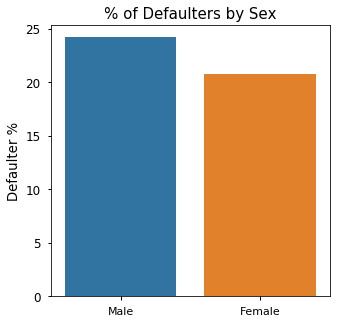

In [23]:
#Bar Chart
col1 = "Sex"
col2 = "Default"
tittle = "% of Defaulters by Sex"
xticks = ["Male", "Female"]
plot0(col1, col2, tittle, xticks, data)

## Effect of Marital Status on proportion of defaulters
- Below we plot the % of Defaulters by Marital Status.**We see that in the dataset Married people are slightly more likely to default.**
- Approximately 24.2% of the Married people defaulted.
- Approximately 21.2% of the Single people defaulted.

In [24]:
#Crosstab
marital_crosstab = pd.crosstab(data['Default'], data['Marital_Status'], margins=True, normalize=False)
new_index = {0: 'Non-default', 1: 'Default', }
new_columns = {1 : 'Marital_Status', 2 : 'Single', 3:'Others'}
marital_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
marital_crosstab/marital_crosstab.loc['All']

Marital_Status,Marital_Status,Single,Others,All
Default,,,,
Non-default,0.765283,0.790717,0.763926,0.7788
Default,0.234717,0.209283,0.236074,0.2212
All,1.000000,1.000000,1.000000,1.0000


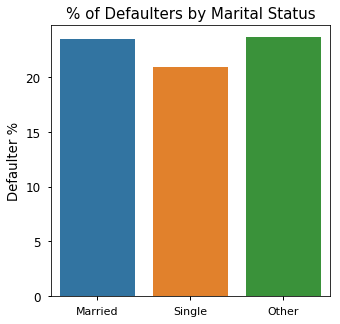

In [25]:
#Bar Chart
col1 = "Marital_Status"
col2 = "Default"
tittle = "% of Defaulters by Marital Status"
xticks = ["Married", "Single", "Other"]
plot0(col1, col2, tittle, xticks, data)

## Effect of Level of Education in the % of defaulters **
- Below we plot the % of Defaulters by Education.**We can see that higher the education less likely is the person to default.**
- Approximately 25.8% of defaulters studied upto High School.
- Approximately 23.7% of defaulters studied upto University.
- Approximately 19.7% of defaulters studied upto Graduate School.

In [26]:
#Crosstab
education_crosstab = pd.crosstab(data['Default'], data['Education'], margins=True, normalize=False)
new_index = {0: 'Non-default', 1: 'Default', }
new_columns = {1 : 'Graduate school', 2 : 'University', 3 : 'High school', 4 : 'Others'}
education_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
education_crosstab/education_crosstab.loc['All']

Education,Graduate school,University,High school,Others,All
Default,,,,,
Non-default,0.807652,0.762651,0.748424,0.929487,0.7788
Default,0.192348,0.237349,0.251576,0.070513,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.0000


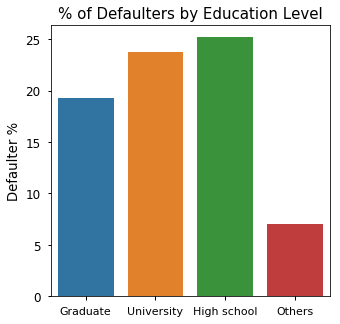

In [27]:
#Bar Chart
col1 = "Education"
col2 = "Default"
tittle = "% of Defaulters by Education Level"
xticks = ["Graduate", "University", "High school", "Others"]
plot0(col1, col2, tittle, xticks, data)

## Effect of age group on proportion of defaulters
- Below we can see the Defaulters distribution by Age.**Majority of defaulters fall in the age group of 25 to 35**
- Defaulters seems to increase from the early 20s to the early 30s.
- Defaulters seems to decrease from the early 40s onward.

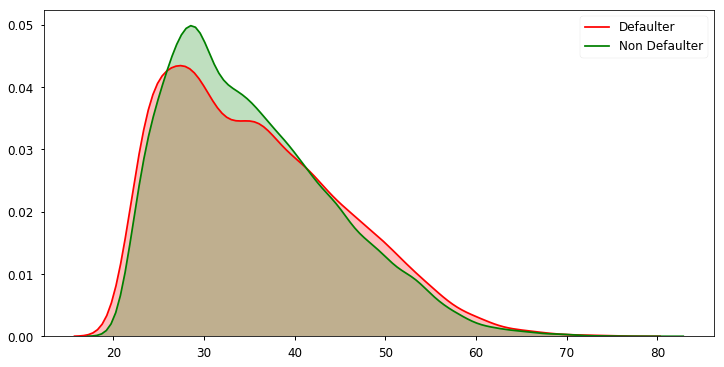

In [28]:
defaulters = data[data["Default"] == 1]
non_defaulters = data[data["Default"] == 0]
defaulters["Defaulter"] = defaulters["Age"]
non_defaulters["Non Defaulter"] = non_defaulters["Age"]
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(defaulters["Defaulter"], shade=True, color="r")
ax = sns.kdeplot(non_defaulters["Non Defaulter"], shade=True, color="g")

## Defaulters correlation with credit limit
- Below we can see the Defaulters distribution by Credit Limit.**we can see that people with lower credit balance tend to default more**

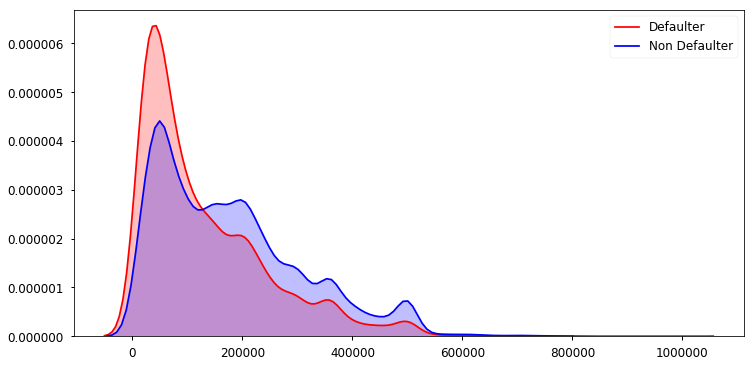

In [29]:
defaulters = data[data["Default"] == 1]
non_defaulters = data[data["Default"] == 0]
defaulters["Defaulter"] = defaulters["Credit_limit"]
non_defaulters["Non Defaulter"] = non_defaulters["Credit_limit"]
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(defaulters["Defaulter"], shade=True, color="r")
ax = sns.kdeplot(non_defaulters["Non Defaulter"], shade=True, color="b")

In [30]:
# function to make a scatter plot
def plot1(label_list, label_dict, data, col,tittle,xlabel,ylabel, ticks):
  df = {}
  for i in label_list:
      df[i] = data.groupby([i, col]).size().unstack()
      df[i] = df[i][df[i].sum(axis=1)>25]
      df[i] = df[i].div(df[i].sum(axis=1), axis='index') # Calculate proportions
      df[i].sort_index(ascending=False, inplace=True)
          
  sns.set_palette(sns.light_palette("blue", reverse=True))   # plot
  fig, ax = plt.subplots(1, 1, figsize=(6,4))

  for i in label_list:
      ax.scatter(x=df[i].index, y=df[i][1], label=label_dict.get(i), s=100, edgecolor='k', lw=1)          

  ax.set_ylim([0, 1])
  plt.xticks(ticks, rotation=0)
  ax.xaxis.set_ticks(ticks=ticks, minor=False)
  ax.grid(b=True, which='major', color='0.4', linestyle='--')
  lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)
  for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(14) 
  for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(14) 
  for spine in ax.spines.values():
      spine.set_edgecolor('k')
  sns.set_palette(sns.light_palette("green", reverse=True))
  plt.title(tittle, fontsize=17, y = 1.05) 
  plt.ylabel(xlabel, fontsize=14)
  plt.xlabel(ylabel, fontsize=14)
  plt.show()

## Influence of past repayment statuses on probability of a defaulter
- The proportion of defaulters in delinquency bucket 2 or more i.e. with payment delay for 2 or more months are much higher.

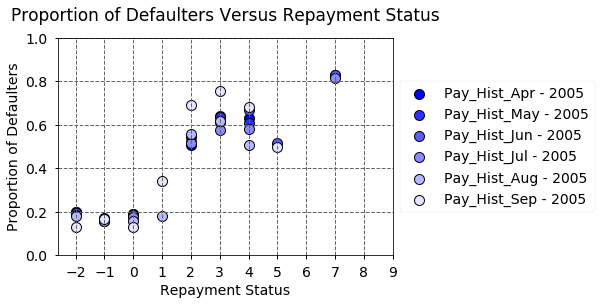

In [31]:
label_list =['Pay_Hist_Apr',  'Pay_Hist_May',  'Pay_Hist_Jun',  'Pay_Hist_Jul',  'Pay_Hist_Aug',  'Pay_Hist_Sep']
label_dict ={'Pay_Hist_Apr': 'Pay_Hist_Apr - 2005',
             'Pay_Hist_May': 'Pay_Hist_May - 2005',
             'Pay_Hist_Jun': 'Pay_Hist_Jun - 2005',
             'Pay_Hist_Jul': 'Pay_Hist_Jul - 2005', 
             'Pay_Hist_Aug': 'Pay_Hist_Aug - 2005',
             'Pay_Hist_Sep': 'Pay_Hist_Sep - 2005'          
               
             }

col = 'Default'
tittle = 'Proportion of Defaulters Versus Repayment Status'
xlabel = 'Proportion of Defaulters'
ylabel = 'Repayment Status'
ticks = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8,9]
plot1(label_list, label_dict, data, col,tittle,xlabel,ylabel,ticks)

# 3. Predictive Modeling

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from xgboost import XGBClassifier
warnings.filterwarnings('ignore') # to supress warnings

In [33]:
x = data.drop(['Default'],axis = 1)
y = data.Default

# rescale the metrics to the same mean and standard deviation
scaler = preprocessing.StandardScaler()
x = scaler.fit(x).transform(x)

# Further divide the train data into train test split 80% & 20% respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

**Here we are first trying out below listed classification models to get the first look at accuracy**

In [34]:
# list of different classifiers we are going to test
clfs = {
'LogisticRegression' : LogisticRegression(),
'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier(),
'XGBClassifier': XGBClassifier()
}

In [35]:
# code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,LogisticRegression,0.717540,0.237378,0.356738,0.810667
1,GaussianNB,0.443900,0.614167,0.515334,0.744500
2,RandomForest,0.634247,0.348907,0.450170,0.811500
3,DecisionTreeClassifier,0.399022,0.430294,0.414068,0.730667
4,KNeighborsClassifier,0.535047,0.345139,0.419606,0.788833
5,GradientBoosting,0.688666,0.361718,0.474308,0.822667
6,XGBClassifier,0.688047,0.355690,0.468952,0.821833


### From above report lets take the 4 highest accuracy Models and compare them all ( RF, LR, GB, XGB)

In [36]:
# Function to optimize model using gridsearch 
def gridsearch(model, params,x_train, x_test, y_train, y_test, kfold):
    gs = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold)
    gs.fit(x_train, y_train)
    print ('Best params: ', gs.best_params_)
    print ('Best AUC on Train set: ', gs.best_score_)
    print ('Best AUC on Test set: ', gs.score(x_test, y_test))

# Function to generate confusion matrix
def confmat(md, model_name):
    plt.figure(figsize=(4,3))
    ConfMatrix = confusion_matrix(y_test,md.predict(x_test))
    sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion Matrix - " + model_name);


def model(md, x_train, y_train,x_test, y_test,model_name):
    md.fit(x_train, y_train)
    pred = md.predict(x_test)
    print (' ' )
    print ('Accuracy on Train set: ', md.score(x_train, y_train))
    print ('Accuracy on Test set: ', md.score(x_test, y_test))
    print (' ')
    print(classification_report(y_test, pred))
    print (' ')
    confmat(md, model_name)
    return md

### Parameter tuning

There are a few parameters that require tuning to improve the performance. I use GridSearchCV method to test model through a series of parameter values.

### RandomForestClassifier

In [51]:
# Use gridsearch to fine tune the parametersTree = RandomForestClassifier()
tree = RandomForestClassifier()
tree_params = {'n_estimators': [50,100,150],
               "max_features": [1,2,3,4,5],
               'max_depth': [1,2,3,4,5]}
gridsearch(tree, tree_params,x_train, x_test, y_train, y_test,5)

Best params:  {'max_depth': 5, 'max_features': 5, 'n_estimators': 100}
Best AUC on Train set:  0.8193333333333334
Best AUC on Test set:  0.8206666666666667


 
Accuracy on Train set:  0.8236666666666667
Accuracy on Test set:  0.8198333333333333
 
             precision    recall  f1-score   support

          0       0.83      0.96      0.89      4673
          1       0.69      0.33      0.45      1327

avg / total       0.80      0.82      0.79      6000

 


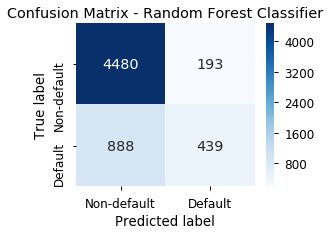

In [52]:
# feature selection with the best model from grid search
tree = RandomForestClassifier(criterion= 'gini', max_depth= 5, 
                                     max_features= 5, n_estimators= 100, 
                                     random_state=0)
model_gb = model(tree, x_train, y_train,x_test, y_test,'Random Forest Classifier')

### Logistic regression

In [37]:
# Use gridsearch to fine tune the parameters
lr = LogisticRegression()
lr_params = {'C': np.logspace(-5, 8, 15)}
gridsearch(lr, lr_params,x_train, x_test, y_train, y_test,5)

Best params:  {'C': 0.05179474679231213}
Best AUC on Train set:  0.8107083333333334
Best AUC on Test set:  0.8111666666666667


 
Accuracy on Train set:  0.81175
Accuracy on Test set:  0.8111666666666667
 
             precision    recall  f1-score   support

          0       0.82      0.97      0.89      4673
          1       0.72      0.24      0.36      1327

avg / total       0.80      0.81      0.77      6000

 


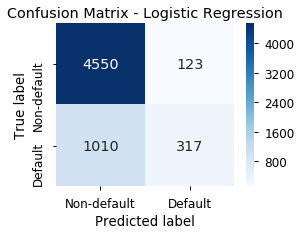

In [38]:
# feature selection with the best model from grid search
lr = LogisticRegression(C= 0.05, random_state=0)
model_gb = model(lr, x_train, y_train,x_test, y_test,'Logistic Regression')

### GradientBoosting

In [39]:
# Use gridsearch to fine tune the parameters
gb = GradientBoostingClassifier()
gb_params = {'n_estimators': [100,200,300],'learning_rate' : [0.01, 0.02, 0.05, 0.1]}
gridsearch(gb, gb_params,x_train, x_test, y_train, y_test,5)

Best params:  {'learning_rate': 0.05, 'n_estimators': 100}
Best AUC on Train set:  0.822
Best AUC on Test set:  0.8208333333333333


 
Accuracy on Train set:  0.86
Accuracy on Test set:  0.8223333333333334
 
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      4673
          1       0.68      0.37      0.48      1327

avg / total       0.81      0.82      0.80      6000

 


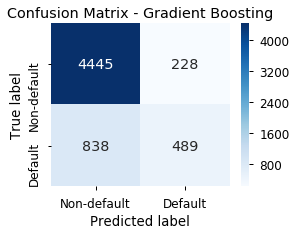

In [45]:
# feature selection with the best model from grid search
gb = GradientBoostingClassifier(learning_rate= 0.05, max_depth= 7,n_estimators=100, max_features = 0.9,min_samples_leaf = 5)
model_gb = model(gb, x_train, y_train,x_test, y_test,'Gradient Boosting')

### XGboost

In [40]:
# Use gridsearch to fine tune the parameters
xgb = XGBClassifier()
xgb_params = {'n_estimators':[200,300],'learning_rate':[0.05,0.02], 'max_depth':[4],'min_child_weight':[0],'gamma':[0]}
gridsearch(xgb, xgb_params,x_train, x_test, y_train, y_test,5)

Best params:  {'gamma': 0, 'learning_rate': 0.02, 'max_depth': 4, 'min_child_weight': 0, 'n_estimators': 200}
Best AUC on Train set:  0.821875
Best AUC on Test set:  0.821


 
Accuracy on Train set:  0.826
Accuracy on Test set:  0.82
 
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      4673
          1       0.68      0.35      0.46      1327

avg / total       0.80      0.82      0.80      6000

 


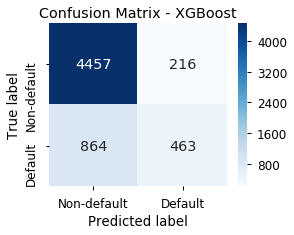

In [41]:
# feature selection with the best model from grid search
xgb = XGBClassifier(
 learning_rate =0.02,
 n_estimators=200,
 max_depth=4,
 min_child_weight=0,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=1,
 scale_pos_weight=1,
 seed=27)
model_xgb = model(xgb, x_train, y_train,x_test, y_test,'XGBoost')

Comparison of model performance
The metrics used to evaluate performance of the different models: accuracy, precision, recall, f1-score, AUC (ROC), and confusion matrix were employed.

Receiver operating characteristic (ROC) Curve
Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. The AUC is the Area Under Curve. If the AUC is high, the model is better distinguishing between positive and negative class. The ROC curve is plotted with “True Positive Rate” or Recall (on the y-axis) against the “False Positive Rate” (on the x-axis). When the AUC is 0.5 means that the model has no discrimination capacity to distinguish between positive and negative class.

The Receiver operating characteristic (ROC) Curve with the respective area under the curve (AUC) are shown below for each model.

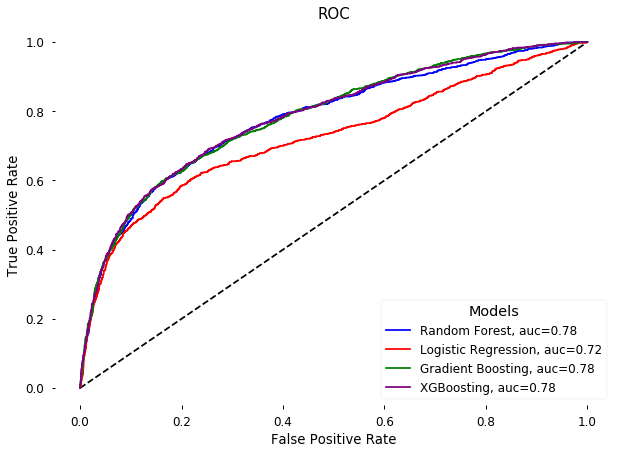

In [53]:
y_pred_proba_RF = tree.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_LR = lr.predict_proba(x_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_LR)

y_pred_proba_GB = gb.predict_proba(x_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_GB)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_GB)

y_pred_proba_XGB = xgb.predict_proba(x_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba_XGB)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba_XGB)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)),color = 'Blue')
plt.plot(fpr2,tpr2,label="Logistic Regression, auc="+str(round(auc2,2)),color ='Red')
plt.plot(fpr3,tpr3,label="Gradient Boosting, auc="+str(round(auc3,2)),color ='Green')
plt.plot(fpr4,tpr4,label="XGBoosting, auc="+str(round(auc4,2)),color ='Purple')
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

### Therefore we see that Gradient Boosting trains with little higher accuracy / auc score/ recall/ precision than other Models. We will use Gradient Boosting for final predictions i.e. fewer False Positives are preferable over a few more False Negatives